# **Obesity Insight Prediction**
**Author**: Mohammad Nusairat\
**Project Description**: Predicting Obesity Risk Based on Lifestyle & Demographic Factors Using Machine Learning Techniques\
**Date**: 4-26-2025\

### **Load Necessary Libraries**
*Below are the libraries required for this project*

**Pandas**: For data manipulation and numerical computations.\
**Scikit-learn**: For data preprocessing and splitting, machine learning models, evaluation metrics, and workflow utilities.\
**Machine Learning Models**: GaussianNB, SVC, Random Forest.\
**Evaluation Metrics**: Accuracy, classification report, and confusion matrix.\
**Matplotlib and Seaborn**: For creating visualizations to visually explore and understand the data.

In [2]:
# Data manipulation and analysis
import pandas as pd

# Data preprocessing and splitting
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder

# Machine Learning models
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier

# Evaluation metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Workflow utilities
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer

# 1st Approach: Naive Bayes

### Step 1. Load the dataset

In [3]:
# Load dataset
data = pd.read_csv('ObesityDataSet.csv')

### Step 2. Load the dataset and display basic information

In [4]:
data.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,BMI
0,Female,21.0,63.8,141.1,1,0,2.0,3.0,1,0,2.0,0,0.0,1.0,0,Public_Transportation,Normal_Weight,24.4
1,Female,21.0,59.8,123.5,1,0,3.0,3.0,1,1,3.0,1,3.0,0.0,1,Public_Transportation,Normal_Weight,24.3
2,Male,23.0,70.9,169.8,1,0,2.0,3.0,1,0,2.0,0,2.0,1.0,2,Public_Transportation,Normal_Weight,23.7
3,Male,27.0,70.9,191.8,0,0,3.0,3.0,1,0,2.0,0,2.0,0.0,2,Walking,Overweight_Level_I,26.8
4,Male,22.0,70.1,198.0,0,0,2.0,1.0,1,0,2.0,0,0.0,0.0,1,Public_Transportation,Overweight_Level_II,28.3


In [5]:
data.shape

(2111, 18)

               Age       Height       Weight  family_history_with_overweight  \
count  2111.000000  2111.000000  2111.000000                     2111.000000   
mean     23.972525    66.995216   190.890857                        0.817622   
std       6.308664     3.673707    57.742270                        0.386247   
min      14.000000    57.100000    86.000000                        0.000000   
25%      19.000000    64.200000   144.350000                        1.000000   
50%      22.000000    66.900000   183.000000                        1.000000   
75%      26.000000    69.600000   236.850000                        1.000000   
max      61.000000    78.000000   381.400000                        1.000000   

              FAVC         FCVC          NCP         CAEC        SMOKE  \
count  2111.000000  2111.000000  2111.000000  2111.000000  2111.000000   
mean      0.883941     2.423496     2.687826     1.140692     0.020843   
std       0.320371     0.583905     0.809680     0.468543

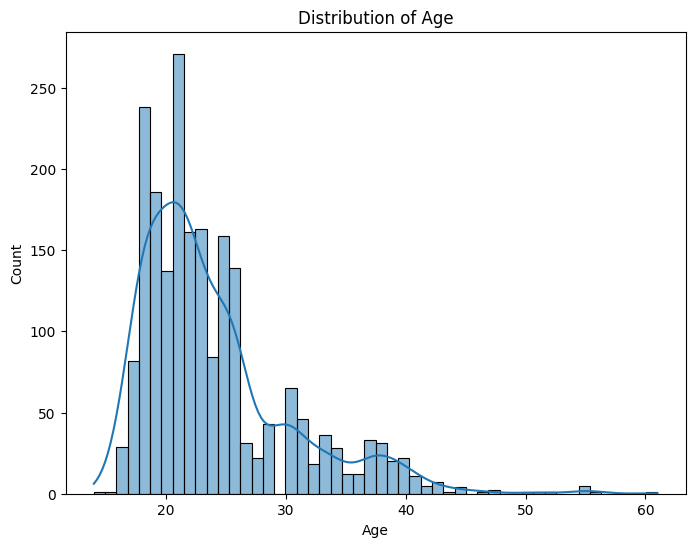

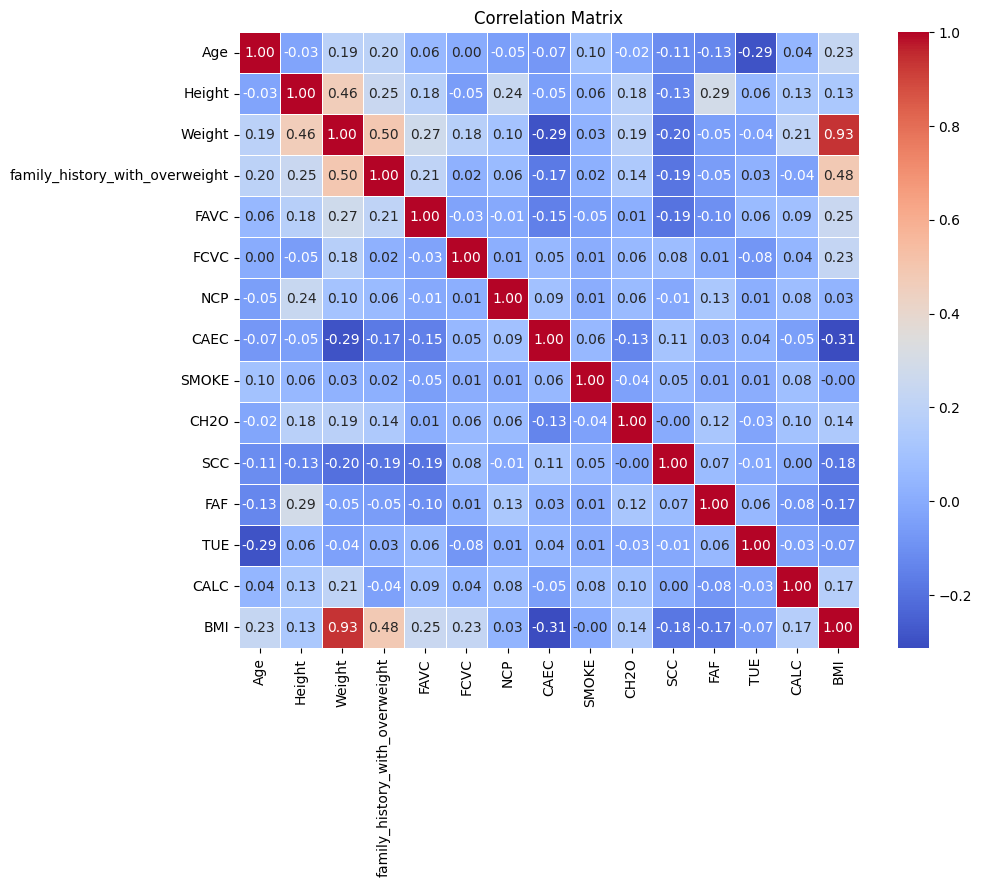

In [6]:
# Basic statistics
print(data.describe())

# Basic statistics
print("# Basic Statistics:")
print(data.describe())

# Distribution of a numerical column (example: 'Age' if available)
plt.figure(figsize=(8, 6))
sns.histplot(data=data, x='Age', bins=50, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# Correlation matrix for numeric data
plt.figure(figsize=(10, 8))
numeric_data = data.select_dtypes(include='number')
correlation_matrix = numeric_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

### Step 3. Prepare the data

In [7]:
# Specify the feature matrix X and the target vector y
X = data.drop('NObeyesdad', axis=1)
y = data['NObeyesdad']

# Encode categorical variables if any
le = LabelEncoder()
for col in X.columns:
    if X[col].dtype == 'object':
        X[col] = le.fit_transform(X[col])


### Step 4. Split the data into training and testing sets

In [8]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Step 5. Initialize and train the Naive Bayes classifier

In [9]:
# Initialize the Naive Bayes classifier
model = GaussianNB()

# Train the model
model.fit(X_train, y_train)


GaussianNB()

### Step 6. Make predictions and calculate accuracy

In [10]:
# Make predictions
predictions = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy}')

report = classification_report(y_test, predictions)
print(report)


Accuracy: 0.8959810874704491
                     precision    recall  f1-score   support

Insufficient_Weight       0.82      1.00      0.90        56
      Normal_Weight       0.88      0.73      0.80        62
     Obesity_Type_I       0.96      0.82      0.88        78
    Obesity_Type_II       0.86      0.98      0.92        58
   Obesity_Type_III       0.97      1.00      0.98        63
 Overweight_Level_I       0.91      0.86      0.88        56
Overweight_Level_II       0.87      0.92      0.89        50

           accuracy                           0.90       423
          macro avg       0.90      0.90      0.89       423
       weighted avg       0.90      0.90      0.89       423



<Figure size 1000x700 with 0 Axes>

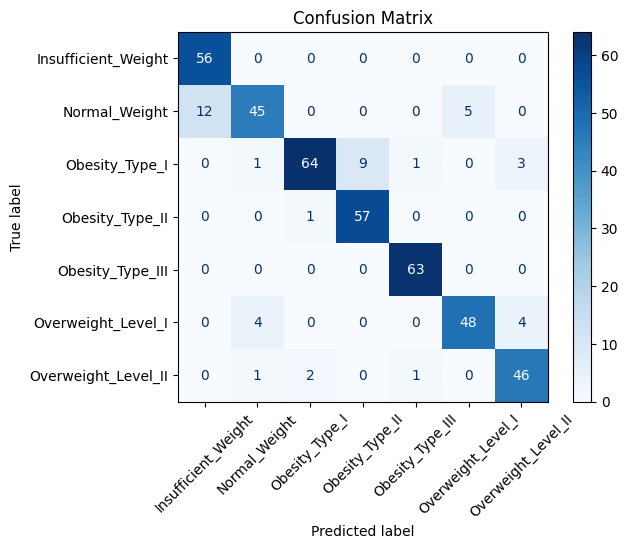

In [11]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=model.classes_)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
disp.plot(cmap='Blues', values_format='d')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.title('Confusion Matrix')
plt.show()

# 2nd Approach: SVC

### Step 1. Load the dataset

In [12]:
data = pd.read_csv('ObesityDataSet.csv')

### Step 2. Define categorical and continuous features

In [13]:
categorical_features = ['Gender', 'CALC', 'FAVC', 'SCC', 'SMOKE', 'family_history_with_overweight', 'CAEC', 'MTRANS']
continuous_features = ['Age', 'Height', 'Weight', 'FCVC', "NCP", 'CH2O', 'FAF', 'TUE']


### Step 3. Encode target and categorical features

In [14]:
label_encoder = LabelEncoder()

# Encoding the target variable
data['NObeyesdad'] = label_encoder.fit_transform(data['NObeyesdad'])

# Encoding categorical variables
data[categorical_features] = data[categorical_features].apply(label_encoder.fit_transform)


### Step 4. Prepare feature matrix X and target vector y

In [15]:
X = data.drop('NObeyesdad', axis=1)
y = data['NObeyesdad']


### Step 5. Split the data into training and testing sets

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)


### Step 6. Scale the features

In [ ]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


### Step 7. Initialize and train the SVM classifier

In [17]:
classifier = SVC(kernel='linear', random_state=0)
classifier.fit(X_train, y_train)


SVC(kernel='linear', random_state=0)

### Step 8. Make predictions and evaluate the model

In [18]:
predictions = classifier.predict(X_test)

report = classification_report(y_test, predictions)
print(report)

              precision    recall  f1-score   support

           0       0.90      0.99      0.94       135
           1       0.98      0.85      0.91       151
           2       0.99      0.94      0.96       170
           3       0.95      1.00      0.97       153
           4       1.00      0.99      1.00       163
           5       0.87      0.96      0.91       141
           6       0.94      0.91      0.93       143

    accuracy                           0.95      1056
   macro avg       0.95      0.95      0.95      1056
weighted avg       0.95      0.95      0.95      1056



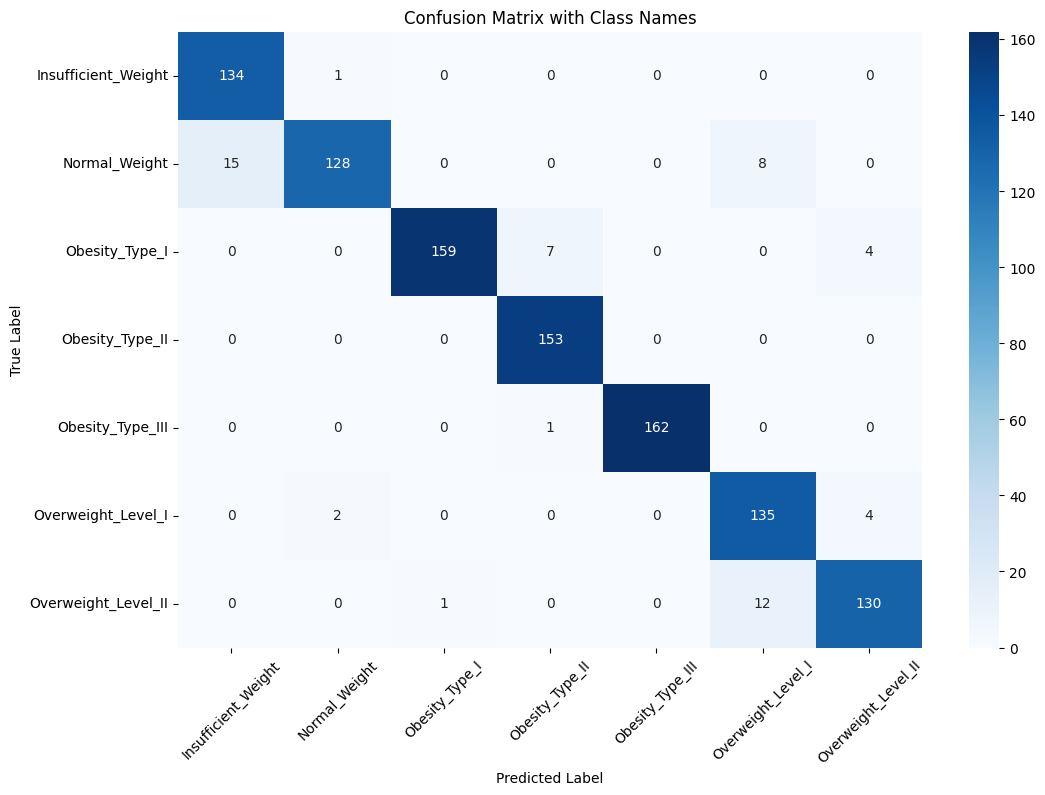

Accuracy: 0.9479166666666666


In [19]:
# Manually specify the correct class names
class_names = [
    "Insufficient_Weight",
    "Normal_Weight",
    "Obesity_Type_I",
    "Obesity_Type_II",
    "Obesity_Type_III",
    "Overweight_Level_I",
    "Overweight_Level_II"
]

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)

# Plot confusion matrix
plt.figure(figsize=(12, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix with Class Names')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.yticks(rotation=0)  # Keep y-axis labels horizontal
plt.show()

# Calculate and print the accuracy
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")


# Best Approach: Ensemble Method with Support Vector, Random Forest and Gradient Boosting Classifier

### Step 1. Load the dataset

In [20]:
data = pd.read_csv('ObesityDataSet.csv')

### Step 2. Select categorical and numerical columns

In [21]:
categorical_cols = data.select_dtypes(include=['object']).columns.tolist()
categorical_cols.remove('NObeyesdad')  # Remove the target column from the list
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns.tolist()


### Step 3. Create a preprocessing transformer

In [22]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ])


### Step 4. Define individual classifiers and the ensemble model

In [23]:
rf = RandomForestClassifier(random_state=42)
svc = SVC(probability=True, random_state=42)
gb = GradientBoostingClassifier(random_state=42)

ensemble_model = VotingClassifier(
    estimators=[
        ('rf', rf),
        ('svc', svc),
        ('gb', gb)
    ],
    voting='soft'  # Using 'soft' voting
)


### Step 5. Create the pipeline with preprocessing and ensemble model

In [24]:
ensemble_pipeline = make_pipeline(preprocessor, ensemble_model)


### Step 6. Split the data into training and testing sets

In [25]:
X = data.drop('NObeyesdad', axis=1)
y = data['NObeyesdad']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Step 7. Train the ensemble model

In [26]:
ensemble_pipeline.fit(X_train, y_train)


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num', 'passthrough',
                                                  ['Age', 'Height', 'Weight',
                                                   'family_history_with_overweight',
                                                   'FAVC', 'FCVC', 'NCP',
                                                   'CAEC', 'SMOKE', 'CH2O',
                                                   'SCC', 'FAF', 'TUE', 'CALC',
                                                   'BMI']),
                                                 ('cat', OneHotEncoder(),
                                                  ['Gender', 'MTRANS'])])),
                ('votingclassifier',
                 VotingClassifier(estimators=[('rf',
                                               RandomForestClassifier(random_state=42)),
                                              ('svc',
                                               SVC(probability=True,
                                                   random_state=42)),
                                              ('gb',
                                               GradientBoostingClassifier(random_state=42))],
                                  voting='soft'))])

In [27]:
import joblib

# Save the trained model
joblib.dump(ensemble_pipeline, 'model.pkl')

# Save the fitted scaler
joblib.dump(sc, 'scaler.pkl')

['scaler.pkl']

### Step 8. Predict and evaluate the ensemble model

In [28]:
y_pred = ensemble_pipeline.predict(X_test)
report = classification_report(y_test, y_pred)
print(report)


                     precision    recall  f1-score   support

Insufficient_Weight       0.98      0.95      0.96        56
      Normal_Weight       0.92      0.98      0.95        62
     Obesity_Type_I       1.00      0.99      0.99        78
    Obesity_Type_II       0.98      1.00      0.99        58
   Obesity_Type_III       1.00      1.00      1.00        63
 Overweight_Level_I       1.00      0.95      0.97        56
Overweight_Level_II       0.98      1.00      0.99        50

           accuracy                           0.98       423
          macro avg       0.98      0.98      0.98       423
       weighted avg       0.98      0.98      0.98       423



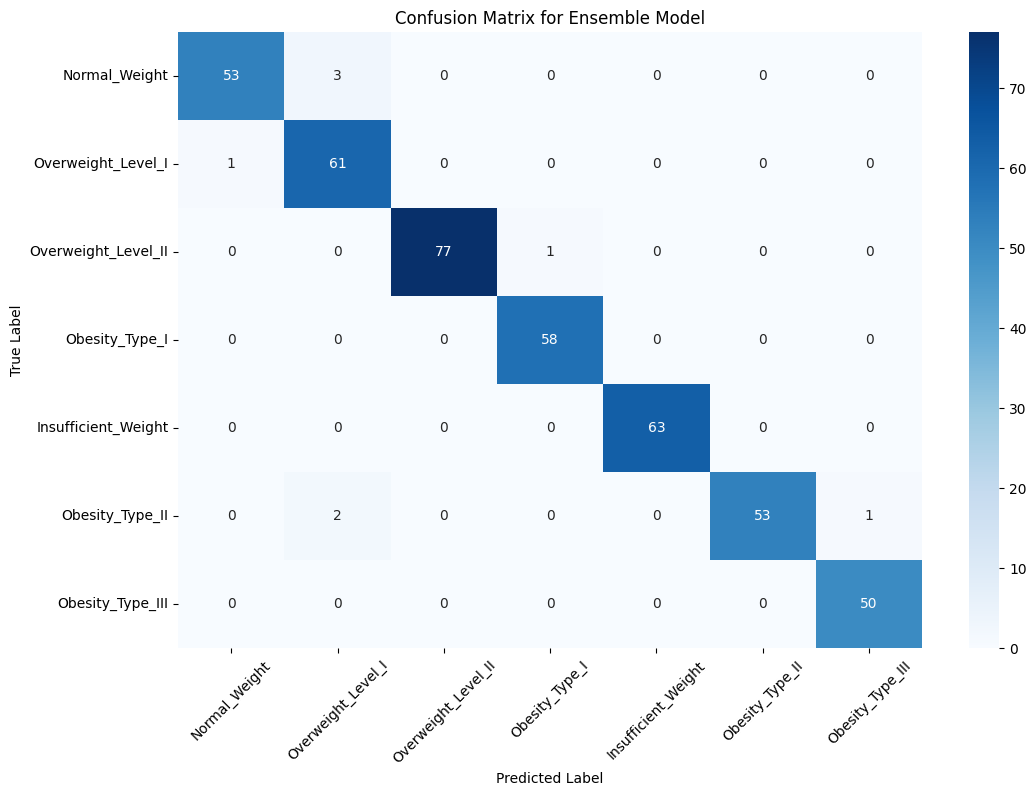

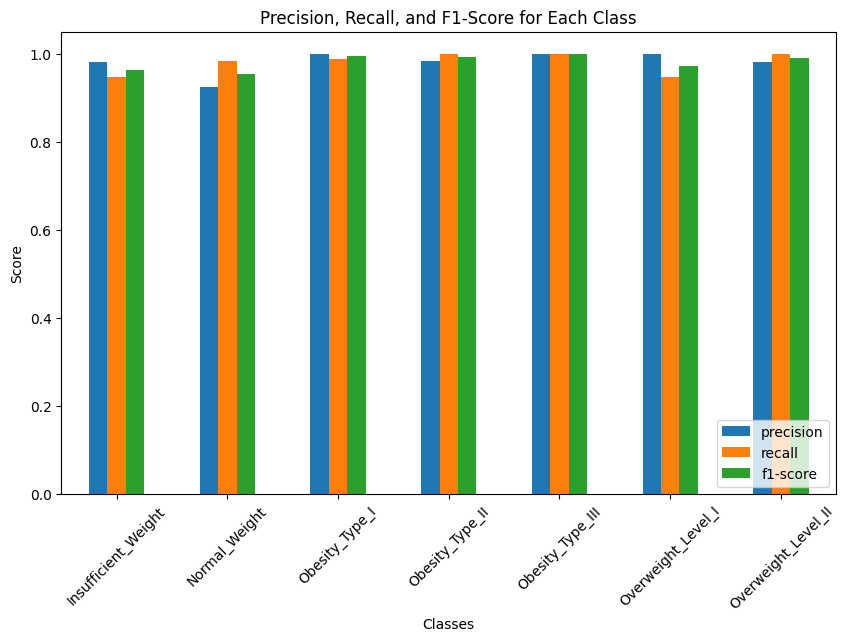

Overall Accuracy: 0.98


In [29]:
# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Manually specify class names (or fetch them if needed)
class_names = y.unique()  # Unique class names from the dataset

# Plot confusion matrix
plt.figure(figsize=(12, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix for Ensemble Model')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.yticks(rotation=0)  # Keep y-axis labels horizontal
plt.show()

# Classification Report Metrics Visualization
report_dict = classification_report(y_test, y_pred, output_dict=True)
scores = pd.DataFrame(report_dict).T

# Bar chart for precision, recall, and F1-score
scores = scores[:-3]  # Remove accuracy, macro avg, and weighted avg
scores[['precision', 'recall', 'f1-score']].plot(kind='bar', figsize=(10, 6))
plt.title('Precision, Recall, and F1-Score for Each Class')
plt.ylabel('Score')
plt.xlabel('Classes')
plt.xticks(rotation=45)
plt.legend(loc='lower right')
plt.show()

# Print overall accuracy
accuracy = report_dict['accuracy']
print(f"Overall Accuracy: {accuracy:.2f}")

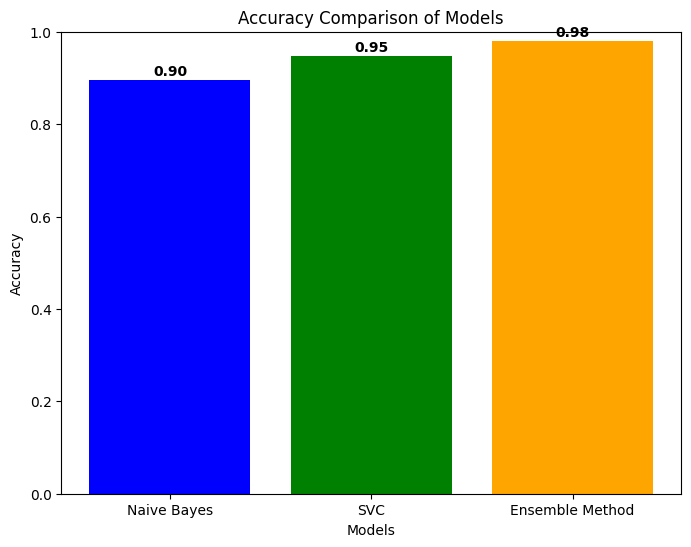

In [30]:
# Define model accuracies (replace these with the actual calculated values)
model_accuracies = {
    'Naive Bayes': 0.8959810874704491,  # Example accuracy, replace with actual value
    'SVC': 0.9479166666666666,          # Example accuracy, replace with actual value
    'Ensemble Method': 0.98  # Example accuracy, replace with actual value
}

# Extract model names and their accuracies
models = list(model_accuracies.keys())
accuracies = list(model_accuracies.values())

# Plot the bar chart
plt.figure(figsize=(8, 6))
plt.bar(models, accuracies, color=['blue', 'green', 'orange'])
plt.ylim(0, 1.0)
plt.title('Accuracy Comparison of Models')
plt.ylabel('Accuracy')
plt.xlabel('Models')
for i, v in enumerate(accuracies):
    plt.text(i, v + 0.01, f"{v:.2f}", ha='center', fontweight='bold')  # Add accuracy values above bars
plt.show()